In [1]:
import sys
sys.path.append("..")
import numpy as np
import nn_classifiers as nc
from data_generation import generate_quantile_data

In [25]:
%load_ext autoreload
%autoreload 2

## Generate Dataset

In [13]:
d = 2
k = 5
n = 10000
portions = np.cumsum(np.array([4]*5))

X_train, y_train = generate_quantile_data(d, k, n, portions)
X_test, y_test = generate_quantile_data(d, k, n, portions)

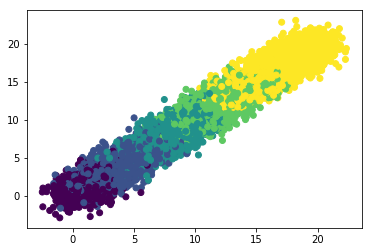

In [14]:
from matplotlib import pyplot as plt
plt.scatter([X_train[:, 0]], [X_train[:, 1]], c=[y_train])

## Set Up Neural Net

In [28]:
nn_clf = nc.NeuralNetQuantile(gamma=0.5, max_iter=20000, 
                 surrogate_type='AT', loss_function='hinge')

In [29]:
nn_clf.fit(X_train, y_train.astype(int), use_multiprocessing=True)

Epoch 1/2
10000/10000 [==============================]10000/10000 [==============================] - 1s 136us/step - loss: 32.3742 - acc: 0.1041 - weighted_lf: 1.1177

Epoch 2/2
10000/10000 [==============================]10000/10000 [==============================] - 1s 52us/step - loss: 32.3750 - acc: 0.1041 - weighted_lf: 1.1177

10000/10000 [==============================]10000/10000 [==============================] - 1s 64us/step

Epoch 1/2
10000/10000 [==============================]10000/10000 [==============================] - 1s 118us/step - loss: 32.4475 - acc: 0.1041 - weighted_lf: 1.2000

Epoch 2/2
10000/10000 [==============================]10000/10000 [==============================] - 1s 51us/step - loss: 32.4521 - acc: 0.1041 - weighted_lf: 1.2000

10000/10000 [==============================]10000/10000 [==============================] - 1s 70us/step

Epoch 1/2
10000/10000 [==============================]10000/10000 [==============================] - 1s 124us/step - los

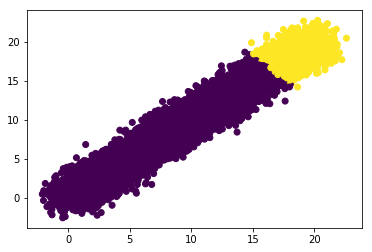

In [30]:
plt.scatter([X_test[:, 0]], [X_test[:, 1]], c=[nn_clf.predict(X_test)])